In [1]:
import pprint
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json_shot_scraper import flatten_shot, flatten_goal, flatten_complete_pass, flatten_incomplete_pass
from  player_scraper import flatten_player, flatten_sub

In [2]:
with open ('data/448588.json') as f:
    data = json.load(f)
    game_id = 448588

In [9]:
data.keys()

dict_keys(['Revision', 'lastChangedDate', 'lastChangeBy', 'match', 'status', 'venueInformation', 'broadcast', 'scoreStatus', 'players', 'teams', 'officials', 'incidences', 'deletedIncidences', 'summary', 'commentary'])

In [11]:
data['match'].keys()

dict_keys(['revision', 'matchId', 'homeTeamId', 'homeTeamName', 'awayTeamId', 'awayTeamName', 'date', 'dayName', 'scheduledStart', 'gmt', 'stadiumGMT', 'league', 'leagueId', 'competition', 'competitionId', 'competitionGender', 'week', 'weekId', 'loadLevel', 'levelName', 'coverageLevel', 'fn', 'channel', 'matchRating'])

In [13]:
data['match']['homeTeamId']

17

In [17]:
data['incidences'].keys()

dict_keys(['goals', 'substitutions', 'clearances', 'cornerKicks', 'correctPasses', 'fouls', 'incorrectPasses', 'offsides', 'redCards', 'shots', 'status', 'stealings', 'yellowCards', 'throwIn', 'goalkick', 'nutmegs', 'sombreros', 'penaltyShootout'])

In [3]:
data['incidences'].keys()
goals = list(data['incidences']['goals'].items())
goal_list_dicts = [flatten_goal(goal, game_id) for goal in goals]

In [4]:
goal_df = pd.DataFrame(goal_list_dicts)

In [5]:
goal_df

,assisted_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,goal_id,player_id,shot_type,team_id
0,28126.0,0.83,1.00,-0.14,0.08,-1,0.10,448588,22823436,54702,9,17
1,NaN,0.96,1.00,-0.18,-0.11,-1,0.25,448588,22823953,51413,11,17
2,NaN,-0.67,-0.98,0.17,-0.13,-1,0.18,448588,22825994,54702,9,17
3,118855.0,0.77,0.99,-0.06,-0.11,-1,0.18,448588,22826185,47487,11,134
4,NaN,-0.73,-1.00,-0.01,0.06,-1,0.18,448588,22826995,77919,13,17


In [22]:
transpose_test_df = goal_df.copy()

In [26]:
neg_df = transpose_test_df.loc[transpose_test_df['coord_x1'] < 0]
neg_df

,assisted_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,goal_id,player_id,shot_type,team_id
2,NaN,-0.67,-0.98,0.17,-0.13,-1,0.18,448588,22825994,54702,9,17
4,NaN,-0.73,-1.00,-0.01,0.06,-1,0.18,448588,22826995,77919,13,17


In [27]:
pos_df = transpose_test_df.loc[transpose_test_df['coord_x1'] > 0]
pos_df

,assisted_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,goal_id,player_id,shot_type,team_id
0,28126.0,0.83,1.00,-0.14,0.08,-1,0.10,448588,22823436,54702,9,17
1,NaN,0.96,1.00,-0.18,-0.11,-1,0.25,448588,22823953,51413,11,17
3,118855.0,0.77,0.99,-0.06,-0.11,-1,0.18,448588,22826185,47487,11,134


### now want to multiply coord_x1, coord_x2, coord_y1, coord_y2 in neg_df by -1

In [55]:
neg_df.loc[:,['coord_x1', 'coord_x2', 'coord_y1', 'coord_y2']] *= -1

/Users/david/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
neg_df

,assisted_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,goal_id,player_id,shot_type,team_id
2,NaN,0.67,0.98,-0.17,0.13,-1,0.18,448588,22825994,54702,9,17
4,NaN,0.73,1.00,0.01,-0.06,-1,0.18,448588,22826995,77919,13,17


In [63]:
transposed_goal_df = pd.concat([neg_df, pos_df])

In [64]:
transposed_goal_df

,assisted_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,goal_id,player_id,shot_type,team_id
2,NaN,0.67,0.98,-0.17,0.13,-1,0.18,448588,22825994,54702,9,17
4,NaN,0.73,1.00,0.01,-0.06,-1,0.18,448588,22826995,77919,13,17
0,28126.0,0.83,1.00,-0.14,0.08,-1,0.10,448588,22823436,54702,9,17
1,NaN,0.96,1.00,-0.18,-0.11,-1,0.25,448588,22823953,51413,11,17
3,118855.0,0.77,0.99,-0.06,-0.11,-1,0.18,448588,22826185,47487,11,134


In [59]:
goal_df

,assisted_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,goal_id,player_id,shot_type,team_id
0,28126.0,0.83,1.00,-0.14,0.08,-1,0.10,448588,22823436,54702,9,17
1,NaN,0.96,1.00,-0.18,-0.11,-1,0.25,448588,22823953,51413,11,17
2,NaN,-0.67,-0.98,0.17,-0.13,-1,0.18,448588,22825994,54702,9,17
3,118855.0,0.77,0.99,-0.06,-0.11,-1,0.18,448588,22826185,47487,11,134
4,NaN,-0.73,-1.00,-0.01,0.06,-1,0.18,448588,22826995,77919,13,17


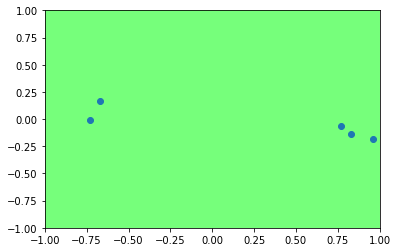

In [60]:
fig, ax = plt.subplots()
ax.scatter(goal_df['coord_x1'], goal_df['coord_y1'])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_facecolor('xkcd:lightgreen')

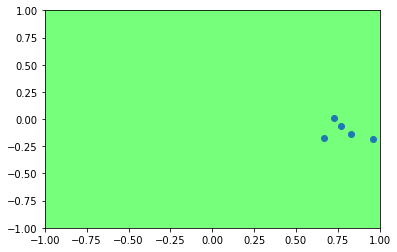

In [65]:
fig, ax = plt.subplots()
ax.scatter(transposed_goal_df['coord_x1'], transposed_goal_df['coord_y1'])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_facecolor('xkcd:lightgreen')

### think it worked...

In [6]:
shots = list(data['incidences']['shots'].items())
shot_list_dicts = [flatten_shot(shot, game_id) for shot in shots]
shot_df = pd.DataFrame(shot_list_dicts)

In [7]:
shots = list(data['incidences']['shots'].items())
shot_list_dicts = [flatten_shot(shot, game_id) for shot in shots]
shot_df = pd.DataFrame(shot_list_dicts)

In [8]:
shot_df

,caught_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,player_id,shot_id,shot_type,t_half,t_min,t_sec,team_id,time_of_event(min)
0,NaN,0.75,0.99,-0.07,0.06,-1,-1.00,448588,28126,22822829,33,1,3,30,17,3.500000
1,NaN,-0.48,-0.99,0.02,-0.12,-1,-1.00,448588,136947,22822912,33,1,6,55,134,6.916667
2,NaN,-0.75,-0.99,-0.14,0.21,-1,-1.00,448588,1325,22822926,33,1,7,30,134,7.500000
3,49859.0,-0.43,-0.96,-0.06,0.07,-1,0.33,448588,118855,22822958,35,1,8,40,134,8.666667
4,NaN,-0.47,-1.00,-0.17,-0.27,-1,-1.00,448588,1325,22823013,33,1,10,31,134,10.516667
5,NaN,0.83,1.00,-0.14,0.08,-1,0.10,448588,54702,22823436,9,1,22,30,17,22.500000
6,49859.0,-0.67,-0.94,-0.36,-0.04,-1,0.08,448588,27793,22823456,35,1,24,1,134,24.016667
7,NaN,0.97,1.00,0.45,0.16,-1,-1.00,448588,46601,22823838,33,1,32,58,17,32.966667
8,NaN,0.96,1.00,-0.18,-0.11,-1,0.25,448588,51413,22823953,11,1,34,33,17,34.550000
9,NaN,-0.85,-0.99,0.31,-0.26,-1,-1.00,448588,27793,22824052,33,1,36,20,134,36.333333


In [41]:
transpose_shot_df = shot_df.copy()

In [46]:
neg_shot_df = transpose_shot_df.loc[transpose_shot_df['coord_x1'] < 0]
pos_shot_df = transpose_shot_df.loc[transpose_shot_df['coord_x1'] > 0]
neg_shot_df.loc[:,['coord_x1', 'coord_x2', 'coord_y1', 'coord_y2']] *= -1

/Users/david/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
transposed_shot_df = pd.concat([neg_shot_df, pos_shot_df])

In [50]:
transposed_shot_df.head()

,caught_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,player_id,shot_id,shot_type,t_half,t_min,t_sec,team_id,time_of_event(min)
1,NaN,0.48,0.99,-0.02,0.12,-1,-1.00,448588,136947,22822912,33,1,6,55,134,6.916667
2,NaN,0.75,0.99,0.14,-0.21,-1,-1.00,448588,1325,22822926,33,1,7,30,134,7.500000
3,49859.0,0.43,0.96,0.06,-0.07,-1,0.33,448588,118855,22822958,35,1,8,40,134,8.666667
4,NaN,0.47,1.00,0.17,0.27,-1,-1.00,448588,1325,22823013,33,1,10,31,134,10.516667
6,49859.0,0.67,0.94,0.36,0.04,-1,0.08,448588,27793,22823456,35,1,24,1,134,24.016667


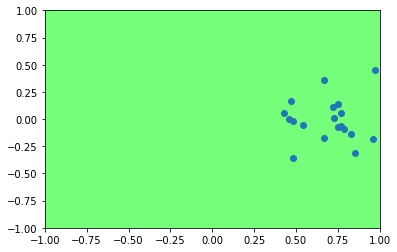

In [49]:
fig, ax = plt.subplots()
ax.scatter(transposed_shot_df['coord_x1'], transposed_shot_df['coord_y1'])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_facecolor('xkcd:lightgreen')

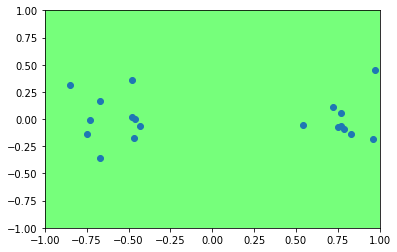

In [40]:
fig, ax = plt.subplots()
ax.scatter(shot_df['coord_x1'], shot_df['coord_y1'])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_facecolor('xkcd:lightgreen')

In [66]:
transposed_goal_df

,assisted_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,goal_id,player_id,shot_type,team_id
2,NaN,0.67,0.98,-0.17,0.13,-1,0.18,448588,22825994,54702,9,17
4,NaN,0.73,1.00,0.01,-0.06,-1,0.18,448588,22826995,77919,13,17
0,28126.0,0.83,1.00,-0.14,0.08,-1,0.10,448588,22823436,54702,9,17
1,NaN,0.96,1.00,-0.18,-0.11,-1,0.25,448588,22823953,51413,11,17
3,118855.0,0.77,0.99,-0.06,-0.11,-1,0.18,448588,22826185,47487,11,134


In [67]:
transposed_shot_df

,caught_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,player_id,shot_id,shot_type,t_half,t_min,t_sec,team_id,time_of_event(min)
1,NaN,0.48,0.99,-0.02,0.12,-1,-1.00,448588,136947,22822912,33,1,6,55,134,6.916667
2,NaN,0.75,0.99,0.14,-0.21,-1,-1.00,448588,1325,22822926,33,1,7,30,134,7.500000
3,49859.0,0.43,0.96,0.06,-0.07,-1,0.33,448588,118855,22822958,35,1,8,40,134,8.666667
4,NaN,0.47,1.00,0.17,0.27,-1,-1.00,448588,1325,22823013,33,1,10,31,134,10.516667
6,49859.0,0.67,0.94,0.36,0.04,-1,0.08,448588,27793,22823456,35,1,24,1,134,24.016667
9,NaN,0.85,0.99,-0.31,0.26,-1,-1.00,448588,27793,22824052,33,1,36,20,134,36.333333
10,49859.0,0.46,0.95,-0.00,0.02,-1,0.08,448588,122082,22824659,35,1,44,48,134,44.800000
12,NaN,0.67,0.98,-0.17,0.13,-1,0.18,448588,54702,22825994,9,2,49,18,17,49.300000
16,NaN,0.73,1.00,0.01,-0.06,-1,0.18,448588,77919,22826995,13,2,71,26,17,71.433333
18,NaN,0.48,1.00,-0.36,-0.07,-1,-1.00,448588,51413,22827782,33,2,85,12,17,85.200000


In [84]:
shots_goal_df = pd.merge(transposed_shot_df, transposed_goal_df.loc[:, ['assisted_by', 'player_id', 'game_id', 'coord_x1', 'coord_x2', 'coord_y1', 'coord_y2', 'coord_z1', 'coord_z2']], on=['player_id', 'game_id', 'coord_x1', 'coord_x2', 'coord_y1', 'coord_y2', 'coord_z1', 'coord_z2'], how='left')

In [85]:
shots_goal_df

,caught_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,player_id,shot_id,shot_type,t_half,t_min,t_sec,team_id,time_of_event(min),assisted_by
0,NaN,0.48,0.99,-0.02,0.12,-1,-1.00,448588,136947,22822912,33,1,6,55,134,6.916667,NaN
1,NaN,0.75,0.99,0.14,-0.21,-1,-1.00,448588,1325,22822926,33,1,7,30,134,7.500000,NaN
2,49859.0,0.43,0.96,0.06,-0.07,-1,0.33,448588,118855,22822958,35,1,8,40,134,8.666667,NaN
3,NaN,0.47,1.00,0.17,0.27,-1,-1.00,448588,1325,22823013,33,1,10,31,134,10.516667,NaN
4,49859.0,0.67,0.94,0.36,0.04,-1,0.08,448588,27793,22823456,35,1,24,1,134,24.016667,NaN
5,NaN,0.85,0.99,-0.31,0.26,-1,-1.00,448588,27793,22824052,33,1,36,20,134,36.333333,NaN
6,49859.0,0.46,0.95,-0.00,0.02,-1,0.08,448588,122082,22824659,35,1,44,48,134,44.800000,NaN
7,NaN,0.67,0.98,-0.17,0.13,-1,0.18,448588,54702,22825994,9,2,49,18,17,49.300000,NaN
8,NaN,0.73,1.00,0.01,-0.06,-1,0.18,448588,77919,22826995,13,2,71,26,17,71.433333,NaN
9,NaN,0.48,1.00,-0.36,-0.07,-1,-1.00,448588,51413,22827782,33,2,85,12,17,85.200000,NaN


instead of assisted by, just figure out who passed before shot...